<a href="https://colab.research.google.com/github/montimaj/Deep-Learning-SE-6213/blob/master/HW2/HW2_Sayantan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SYS ENG 6213 - Deep Learning and Advanced Neural Networks 

### Implementation of two layer neural network for classification of MNIST data



In [3]:
!ls

drive  sample_data


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wGmt-G1CpZDP7cscan3i2lW_1joRn6LCVsePqNb7AGaBgI5sY45yl8
Mounted at /content/drive


In [4]:
%cd 'drive/My Drive/SysEng 6213 Fall 2020 Sayantan Majumdar /HW2/'
!ls

/content/drive/.shortcut-targets-by-id/1xpWpUfn0NqGtbgAP_303jr6QW5RKzJPR/SysEng 6213 Fall 2020 Sayantan Majumdar /HW2
HW2_Sayantan.ipynb  layers.py	MNIST_data
hw2_sayantan.py     layers.pyc	utils.pyc


In this homework you will be implementing a simple two layered neural network to recognize hand-written digits. Open the layers.py file. It has different functions which will be used for training the neural network. You need to complete each function with appropriate code in the spaces provided. You can check the correctness of your code by using the function calls below:

In [5]:
# Import the functions
from layers import *
from utils import *
# Set up the packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [6]:
# Test cell to check if user-defined functions from imported files work
print(softmax(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])))

[[0.09003057 0.24472847 0.66524096]
 [0.09003057 0.24472847 0.66524096]
 [0.09003057 0.24472847 0.66524096]]


In [7]:
# Initialize values for check functions
test_x = np.asarray([
  [-0.000615  ,  0.0214419 , -0.36510585,  0.20082408],
  [ 0.22389826,  0.14115274,  0.05578092,  0.1698094 ],
  [-0.23772221,  0.00885403, -0.13013507,  0.02939912],
  [ 0.05740505, -0.026481  ,  0.09055714, -0.51067097],
  [ 0.02905955, -0.26222096,  0.23401101, -0.32704291]])
test_w = np.asarray([
  [ 0.14083526, -0.00589104, -0.01267299],
  [ 0.2149024 ,  0.05601603,  0.22214587],
  [-0.0246409 ,  0.01524164, -0.16539496],
  [-0.07199102, -0.12796543,  0.2509505 ]])
test_b = np.asarray([0.24348208,  0.02070011, -0.05303671])
fs_scores = np.asarray([[ 0.24254239, -0.00935853,  0.06251788],
       [ 0.29174967,  0.00640839,  0.0088702 ],
       [ 0.21299534,  0.01685097, -0.01915576],
       [ 0.28040822,  0.08560704, -0.20277768],
       [ 0.20900069,  0.05125724, -0.23243211]])
ftest_w = np.asarray([[ 0.03670967,  0.00383852, -0.01189351],
        [-0.01396215, -0.01485459,  0.06874128],
        [-0.02569631,  0.0213285 , -0.09259266],
        [-0.10703647, -0.06077616,  0.19306612]])
ftest_b = np.asarray([ 1.23669631,  0.15076511, -0.38297747])
ftest_x = np.asarray([[ 0.03342136,  0.0654868 , -0.01645924, -0.00057441],
        [ 0.04093848,  0.06502716, -0.00855839, -0.01959743],
        [ 0.03014075,  0.04246176, -0.00182329, -0.02229724],
        [ 0.04155685,  0.02000954,  0.02793369, -0.08202878],
        [ 0.03207832, -0.00384786,  0.03407438, -0.07993428]])
frelu = np.asarray([[ 0.24254239,  0.        ,  0.06251788],
        [ 0.29174967,  0.00640839,  0.0088702 ],
        [ 0.21299534,  0.01685097,  0.        ],
        [ 0.28040822,  0.08560704,  0.        ],
        [ 0.20900069,  0.05125724,  0.        ]])
brelu = np.asarray([[ 0.14254239,  0.        , -0.03748212],
       [ 0.19174967, -0.09359161, -0.0911298 ],
       [ 0.11299534, -0.08314903,  0.        ],
       [ 0.18040822, -0.01439296,  0.        ],
       [ 0.10900069, -0.04874276,  0.        ]])
ssoftmax = np.asarray([[ 0.25380621,  0.25946659,  0.17628115,  0.31044604],
        [ 0.26931036,  0.24792319,  0.22763584,  0.25513061],
        [ 0.21279206,  0.27229653,  0.23696266,  0.27794875],
        [ 0.28410234,  0.26124234,  0.29367879,  0.16097652],
        [ 0.27209608,  0.20333904,  0.33398855,  0.19057633]])
test_y = np.asarray([3, 0, 1, 2, 1])
test_l = 1.3201297629287778
test_de = np.asarray([[ 0.05076124,  0.05189332,  0.03525623, -0.13791079],
        [-0.14613793,  0.04958464,  0.04552717,  0.05102612],
        [ 0.04255841, -0.14554069,  0.04739253,  0.05558975],
        [ 0.05682047,  0.05224847, -0.14126424,  0.0321953 ],
        [ 0.05441922, -0.15933219,  0.06679771,  0.03811527]])


In [8]:
# Run this block to check the values for all functions in layers.py
print('Note: The difference between the actual values and calculated values should be <1e-7 for all functions.')
print('')
print('1. Checking forward_step..')
forward_step_scores, cache = forward_step(test_x, test_w, test_b)
diff = np.sum(np.abs(forward_step_scores - fs_scores))
print('The difference values is: '+str(diff))
if diff < 1e-7:
    print('forward_step check passed ...')
else:
    print('forward_step check failed !!')
print('')
print ('2. Checking backward_step...')
dtest_w, dtest_b, dtest_x = backward_step(fs_scores, cache)
diff_x = np.sum(np.abs(dtest_x - ftest_x))
diff_w = np.sum(np.abs(dtest_w - ftest_w))
diff_b = np.sum(np.abs(dtest_b - ftest_b))
print('The difference values for dx is: ' + str(diff_x))
print('The difference values for dw is: ' + str(diff_w))
print('The difference values for db is: ' + str(diff_b))
if (diff_x < 1e-7 and diff_w < 1e-7 and diff_b < 1e-7):
    print('backward_step check passed !!')
else:
    print('backward_step check failed !!')
print('')
print('3. Checking ReLu_forward...')
r_score, cache = ReLu_forward(fs_scores)
diff_relu = np.sum(np.abs(r_score - frelu))
print('The difference value is: ' + str(diff_relu))
if diff_relu < 1e-7:
    print('ReLu_forward check passed !!')
else:
    print('ReLu_forward check failed !!')
print('')
print('4. Checking ReLu_backward...')
dr_score = ReLu_backward(frelu - 0.1, cache)
diff_relu = np.sum(np.abs(dr_score - brelu))
print('The difference value is: ' + str(diff_relu))
if diff_relu < 1e-7:
    print('ReLu_backward check passed !!')
else:
    print('ReLu_backward check failed !!')
print('')
print('5. Checking softmax...')
s_score = softmax(test_x)
diff = np.sum(np.abs(s_score - ssoftmax))
print('The difference values is: ' + str(diff))
if diff < 1e-7:
    print('softmax check passed !!')
else:
    print('softmax check failed !!')
print('')
print('6. Checking loss...')
l, lde = loss(ssoftmax, test_y)
diff_l = np.sum(np.abs(l - test_l))
diff_de = np.sum(np.abs(lde - test_de))
print('The difference between values for loss is: ' + str(diff_l))
print('The difference between values for de is:' + str(diff_de))
if (diff_l < 1e-7 and diff_de < 1e-7):
    print('loss check passed !!')
else:
    print('loss check failed !!')

Note: The difference between the actual values and calculated values should be <1e-7 for all functions.

1. Checking forward_step..
The difference values is: 3.690392374848528e-08
forward_step check passed ...

2. Checking backward_step...
The difference values for dx is: 5.7273561981582843e-08
The difference values for dw is: 3.372888388855286e-08
The difference values for db is: 2.220446049250313e-16
backward_step check passed !!

3. Checking ReLu_forward...
The difference value is: 0.0
ReLu_forward check passed !!

4. Checking ReLu_backward...
The difference value is: 8.673617379884035e-17
ReLu_backward check passed !!

5. Checking softmax...
The difference values is: 5.824567878010001e-08
softmax check passed !!

6. Checking loss...
The difference between values for loss is: 0.0
The difference between values for de is:4.199999995013748e-08
loss check passed !!


If all the checks are passed, we can now start the training of the neural network for the MNIST dataset. We start by loading the data and displaying few images with their corresponding labels.

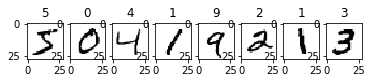

In [9]:
# Load the training data
inputs, labels = load_images_with_labels()

# View first 8 examples
fig, ax = plt.subplots(1,8)
labl = []
for i in range(8):
    ax[i].imshow(inputs[i], cmap=mpl.cm.Greys)
    ax[i].set_title(labels[i])
plt.show()


Now you have the training data and corresponding labels. Each image in training data is of shape (28,28) with values ranging from 0 to 255. However, neural network cannot take data in square format. Therefore, the preprocessing includes converting each image to shape (1,784) and normalizing them.

In [47]:
# Pre-processing the data
train = inputs.reshape(60000, 784) # reshape the inputs shape from (60000,28,28) to (60000,784)
train = np.float32(train) # change the datatype to float
train /= np.max(train, axis=1).reshape(-1, 1) # Normalize the data between 0 and 1

# Now we separate the inputs into training and validation
train_ = train[0: 50000, :] # We use first 50000 images for training
tr_labels = labels[0: 50000]
val = train[50000: 60000,:] # We use the last 10000 images for validation
val_labels = labels[50000: 60000]


In order to simplify the training, we now define a function for forward pass which will be used in training the neural network and predicting.

In [11]:
def forward_pass(x, w1, b1, w2, b2):
    """
    TO DO: Compute the forward pass of the neural network
    Points Allocated: 5
    
    Inputs:
    x: Numpy array of shape (N,d) where N is number of samples 
    and d is the dimension of input
    w1: numpy array of shape (d,H) where H is the size of hidden layer
    w2: numpy array of shape (H,c) where c is the number of classes
    b1: numpy array of shape (H,) 
    b2: numpy array of shape (c,)
    
    Outputs:
    probs: output of shape (N,c)
    cache_out: cache values for output layer
    cache_relu: cache values for ReLu layer
    cache_ip: cache values for input layer
    """
    probs, cache_out, cache_relu, cache_ip = None, None, None, None
    
    ### Type your code here ###
    fs_scores, cache_ip = forward_step(x, w1, b1)
    relu_score, cache_relu = ReLu_forward(fs_scores)
    fs_scores, cache_out = forward_step(relu_score, w2, b2)
    probs = softmax(fs_scores)
    #### End of your code #### 
    
    return(probs,cache_out,cache_relu,cache_ip)
    

Now that you have implemented forward pass, the stochastic gradient descent algorithm works by finding the loss/error in forward pass with respect to target and traversing the error backwards. In the following function, you will implement the backward pass.

In [12]:
def backward_pass(probs, y, cache_out, cache_relu, cache_ip):
    """
    TO DO: Compute the backward pass of the neural network
    Points Allocated: 5
    
    Inputs:
    probs: output of shape (N,c)
    cache_out: cache values for output layer
    cache_relu: cache values for ReLu layer
    cache_ip: cache values for input layer
    
    Outputs:
    loss_: loss value of the forward pass
    dw2: numpy array with samw shape as w2
    db2: numpy array with same shape as b2
    dw1: numpy array with same shape as w1
    db1: numpy array with same shape as b1
    """
    ### Type your code here ###
    loss_, dw_softmax = loss(probs, y)
    dw2, db2, dx = backward_step(dw_softmax, cache_out)
    dw_relu = ReLu_backward(dx, cache_relu)
    dw1, db1, dx = backward_step(dw_relu, cache_ip)
    db1, db2 = db1[0], db2[0]  # converted (1, 30) shape to (30,)    
    #### End of your code #### 
    
    return(loss_,dw2,db2,dw1,db1)

In [13]:
# The following function will be used to predict the labels for given images, weights and biases
def predict(X_batch,parameters):
    probs, _, _, _ = forward_pass(X_batch, parameters['w1'], parameters['b1'], parameters['w2'], parameters['b2'])
    y_pred = np.argmax(probs, axis = 1)
    return (y_pred)

In [40]:
parameters = {}
w1 = 0.3 * np.random.randn(784, 30)
b1 = np.zeros(30)
w2 = 0.3 * np.random.randn(30, 10)
b2 = np.zeros(10)
grads={}
loss_,grads['w1'], grads['b1'], grads['w2'], grads['b2'] = None, None, None, None, None
val_size = 10000
loss_history = []
idx = np.random.choice(50000, 100, replace=True)
x = train[idx]
y = labels[idx]
hi,cache_ip = forward_step(x,w1,b1)
ho, cache_relu = ReLu_forward(hi)
out, cache_out = forward_step(ho,w2,b2)
probs = softmax(out)

In [48]:
def TwoLayerNN(learning_rate, num_iters, batch_size, train, labels, X_val, y_val):
    """
    Function to train the two layered neural network to predict MNIST data.
    Inputs: 
    learning_rate: scalar value contating learning rate for training
    num_iters: number of iterations for training
    batch_size: number of sample used for training in each iteration
    train: trainig data
    labels: labels fro the training data
    X_val: inputs for validation data
    y_val: labels for validation data
    
    Output: 
    parameters: dictionary containing trained weights and biases
    loss_history: list contating loss values for each iteration during training. It will have length of num_iters
    """
    parameters = {}
    parameters['w1'] = 0.3 * np.random.randn(784, 30)
    parameters['b1'] = np.zeros(30)
    parameters['w2'] = 0.3 * np.random.randn(30, 10)
    parameters['b2'] = np.zeros(10)
    grads={}
    loss_, grads['w1'], grads['b1'], grads['w2'], grads['b2'] = None, None, None, None, None
    val_size = 10000
    loss_history = []
    for it in range(num_iters + 1):
        idx = np.random.choice(50000, batch_size, replace=True)
        X_batch = train[idx]
        y_batch = labels[idx]
        # The following steps implement the forward and backward pass
        probs, cache_out, cache_relu, cache_ip = forward_pass(X_batch, parameters['w1'], parameters['b1'], parameters['w2'], parameters['b2'])
        loss_, grads['w2'], grads['b2'], grads['w1'], grads['b1'] = backward_pass(probs, y_batch, cache_out, cache_relu, cache_ip)
        loss_history.append(loss_)
        #Now update the weights and biases in paramaters
        
        ### Type your code here ###
        parameters['w1'] += -learning_rate * grads['w1']
        parameters['b1'] += -learning_rate * grads['b1']
        parameters['w2'] += -learning_rate * grads['w2']
        parameters['b2'] += -learning_rate * grads['b2']
        #### End of your code #### 
        
        train_acc = (predict(X_batch, parameters) == y_batch).mean()
        val_acc = (predict(X_val, parameters) == y_val).mean()
        
        if it % 10 == 0:
            print ('iteration '+str(it) + ' / '+ str(num_iters) +' :loss ' + str(loss_))
            print('training accuracy: '+ str(train_acc) + ' and validation accuracy: '+ str(val_acc))
    return (parameters,loss_history)    

In [49]:
parameters, loss_history = TwoLayerNN(0.05, 1500, 200, train_, tr_labels, val, val_labels) # checking with different learning rate and epoch

iteration 0 / 1500 :loss 6.568068769539004
training accuracy: 0.105 and validation accuracy: 0.1077
iteration 10 / 1500 :loss 2.7311103187149013
training accuracy: 0.265 and validation accuracy: 0.2168
iteration 20 / 1500 :loss 2.233616134833674
training accuracy: 0.335 and validation accuracy: 0.331
iteration 30 / 1500 :loss 1.7769734321398851
training accuracy: 0.435 and validation accuracy: 0.4151
iteration 40 / 1500 :loss 1.5507838687920623
training accuracy: 0.51 and validation accuracy: 0.4752
iteration 50 / 1500 :loss 1.341807903239179
training accuracy: 0.52 and validation accuracy: 0.524
iteration 60 / 1500 :loss 1.4581405477687286
training accuracy: 0.56 and validation accuracy: 0.5582
iteration 70 / 1500 :loss 1.2566192896761417
training accuracy: 0.595 and validation accuracy: 0.5913
iteration 80 / 1500 :loss 1.1568826702259896
training accuracy: 0.69 and validation accuracy: 0.619
iteration 90 / 1500 :loss 1.2016227150769376
training accuracy: 0.585 and validation accuracy

In [56]:
parameters, loss_history = TwoLayerNN(0.1, 2000, 200, train_, tr_labels, val, val_labels)

iteration 0 / 2000 :loss 4.378151976933361
training accuracy: 0.205 and validation accuracy: 0.167
iteration 10 / 2000 :loss 2.4020162008535118
training accuracy: 0.295 and validation accuracy: 0.3419
iteration 20 / 2000 :loss 1.3807227551048278
training accuracy: 0.555 and validation accuracy: 0.4794
iteration 30 / 2000 :loss 1.3742549085193607
training accuracy: 0.555 and validation accuracy: 0.58
iteration 40 / 2000 :loss 1.1988975822159404
training accuracy: 0.625 and validation accuracy: 0.6436
iteration 50 / 2000 :loss 1.0598071356373024
training accuracy: 0.7 and validation accuracy: 0.6861
iteration 60 / 2000 :loss 0.8882535357373266
training accuracy: 0.755 and validation accuracy: 0.7182
iteration 70 / 2000 :loss 0.7585899558749546
training accuracy: 0.765 and validation accuracy: 0.7434
iteration 80 / 2000 :loss 0.8214239844573151
training accuracy: 0.72 and validation accuracy: 0.7631
iteration 90 / 2000 :loss 0.6458534156403879
training accuracy: 0.825 and validation accur

In [53]:
parameters, loss_history = TwoLayerNN(0.1, 1000, 200, train_, tr_labels, val, val_labels)

iteration 0 / 1000 :loss 5.436974210402086
training accuracy: 0.055 and validation accuracy: 0.0764
iteration 10 / 1000 :loss 2.2603439681542103
training accuracy: 0.3 and validation accuracy: 0.282
iteration 20 / 1000 :loss 1.651169990785532
training accuracy: 0.485 and validation accuracy: 0.4407
iteration 30 / 1000 :loss 1.3789651527713624
training accuracy: 0.595 and validation accuracy: 0.5479
iteration 40 / 1000 :loss 1.2519428742165593
training accuracy: 0.63 and validation accuracy: 0.6188
iteration 50 / 1000 :loss 1.0778118434263702
training accuracy: 0.645 and validation accuracy: 0.671
iteration 60 / 1000 :loss 1.0090354725480137
training accuracy: 0.7 and validation accuracy: 0.7064
iteration 70 / 1000 :loss 1.0240694963881674
training accuracy: 0.665 and validation accuracy: 0.7363
iteration 80 / 1000 :loss 0.8827700307649157
training accuracy: 0.73 and validation accuracy: 0.7534
iteration 90 / 1000 :loss 0.7945107403965119
training accuracy: 0.75 and validation accuracy:

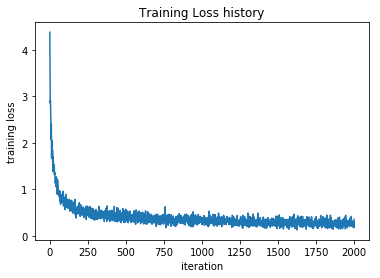

In [57]:
# plot the loss to see how the loss varied over iterations, generated with learning rate = 0.1, iterations=2000
plt.plot(loss_history)
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()


In [58]:
# Loading and pre=processing test data
t_inputs, tlabels = load_images_with_labels(type_of_data='testing')
tinputs = t_inputs.reshape(10000, 784)
tinputs = np.float32(tinputs)
tinputs /= np.max(tinputs,axis=1).reshape(-1, 1)

In [59]:
# Calculate the accuracy on test data using trained weights and biases
pred = predict(tinputs, parameters)
test_acc = (pred == tlabels).mean()
print(test_acc)

0.9243


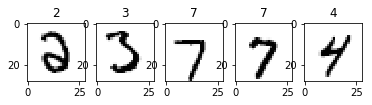

Corresponding predictions of labels for each of the above images: [2, 3, 7, 7, 4]


In [60]:
# Predict the labels for n images for visual representation
n = 5 # number of images to predict
idx = np.random.choice(10000, n, replace=False) # select n random images from test data
labl=[]
# View first n examples
fig, ax = plt.subplots(1,n)
for i, val in enumerate(idx):
    ax[i].imshow(t_inputs[val], cmap=mpl.cm.Greys)
    ax[i].set_title(tlabels[val])
    labl.append(pred[val])
plt.show()

print('Corresponding predictions of labels for each of the above images: '+ str(labl))